In [1]:
import pandas as pd
import os
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def load_data(fileNames):
    dfs = []
    for name in fileNames:
        try:
            dfs.append(pd.read_csv(f"..\Res\{name}", engine='python'))
        except FileNotFoundError as e:
            print("An exception occurred while trying to load the data file")
            print("Exception message:")
            print(e.args)
    return dfs

In [3]:
fileNames = ["dates.csv", "dji_filtered.csv", "gold_filtered.csv", "mcsf_filtered.csv", "oil_filtered.csv",
                 "shanghai_filtered.csv", "sp500_filtered.csv", "events_filtered_scaled.csv"]

In [4]:
dataDfArr = load_data(fileNames)

In [5]:
dataDf = pd.concat(dataDfArr, axis=1)
dataDf["Date"] = dataDf["Date"].apply(lambda x : x[2:])

In [6]:
print(dataDf.head())

       Date  DJIOpen  DJIHigh  DJILow  DJIClose   DJIVolume  GoldOpen  \
0  95-01-03   3834.4   3864.7  3805.5    3838.5  59199248.0    383.00   
1  95-01-04   3838.5   3876.8  3815.3    3857.7  72069925.0    379.50   
2  95-01-05   3857.7   3876.8  3825.4    3850.9  69730827.0    374.80   
3  95-01-06   3850.9   3902.4  3823.7    3867.4  69489474.0    375.55   
4  95-01-09   3867.4   3889.3  3834.4    3861.4  62866917.0    371.40   

   GoldHigh  GoldLow  GoldClose  ...     code_11     code_12     code_13  \
0    383.20   379.05     379.45  ... -472.202900 -350.107878 -586.619315   
1    381.30   373.80     374.30  ... -511.061281 -645.556429 -234.592678   
2    376.60   373.50     375.35  ... -549.640813 -543.008872 -325.655235   
3    376.30   370.80     371.70  ... -414.177173 -603.834841 -433.481027   
4    373.73   371.00     373.10  ... -622.702048 -824.097666 -296.299472   

      code_14     code_15     code_16      code_17      code_18      code_19  \
0 -297.792213  -19.83870

In [7]:
dates = list(dataDf["Date"])

In [33]:
prediction_timespans = [10, 20, 30, 40]

In [34]:
def tick_to_dates(value, tick_number):
    return dates[int(value)]

In [35]:
def real_predicted_plot(ax_data, real_data, predicted_data, start, end, title, locator = 5, ylim_d = 130, ylim_u = 145, format_func = tick_to_dates):
    x_pos = np.arange(start, end, 1, dtype=int)
    ax_data.plot(x_pos, real_data)
    ax_data.plot(x_pos, predicted_data)
    ax_data.set_title(title)
    ax_data.legend(["Real","Predicted"])
    ax_data.xaxis.set_major_locator(plt.LinearLocator(5))
    ax_data.set_ylim(ylim_d,ylim_u) 
    ax_data.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

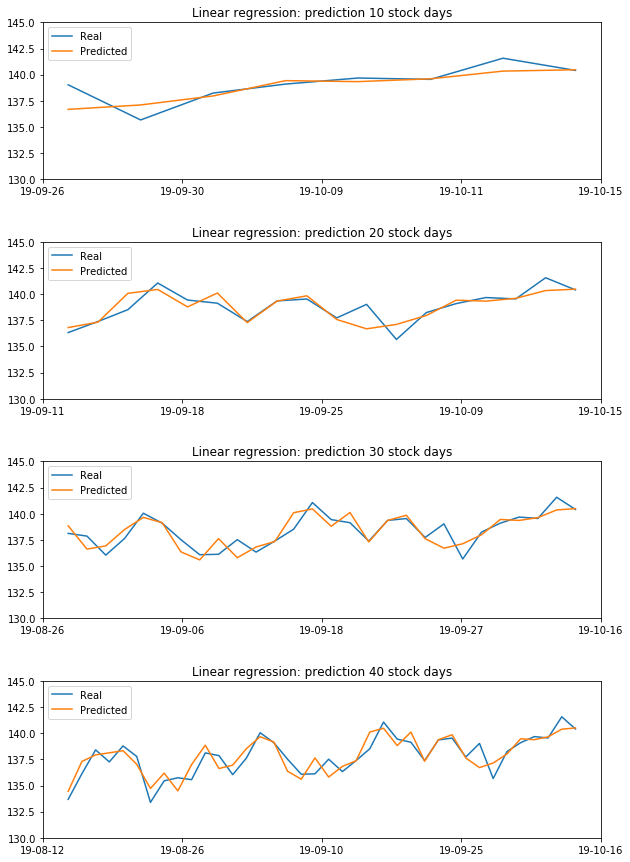

In [41]:
fig, axs = plt.subplots(len(prediction_timespans), figsize=(10,15), gridspec_kw={'hspace': 0.4})
for idx, pred_tmspn in enumerate(prediction_timespans):
    train = dataDf[:-pred_tmspn]
    test = dataDf[-pred_tmspn:-1]
    train['Prediction'] = dataDf[['MCSFClose']].shift(1)
    
    X = np.array(train.drop(['Prediction', 'Date'],1))
    y = np.array(train['Prediction'])
    X = X[1:]
    y = y[1:]
    
    lr=LinearRegression()
    lr.fit(X, y)
    
    testY = np.array(test[['MCSFClose']].shift(1))[1:]
    testX = np.array(test.drop(['Date'],1))[1:]
    
    prediction = lr.predict(testX)
    real_predicted_plot(axs[idx], testY, prediction, len(X), len(X) + len(testX), f'Linear regression: prediction {pred_tmspn} stock days')